In [1]:
import sqlite3
import matplotlib.pyplot as plt

In [2]:
conn=sqlite3.connect('football.sqlite3')
cursor=conn.cursor()

In [3]:
# ამ ბრძანებით, 20 ყველა დროის ყველაზე ძვირად ღირებული ტრანსფერის სიიდან ვაბრუნებთ
# ყველა ფრანგ ფეხბურთელს
cursor.execute('''select Player from transfers where origin='France';''')
data=cursor.fetchall()
print('ფრანგი ფეხბურთელები:')
for player in data:
    print(player[0])

ფრანგი ფეხბურთელები:
Kylian Mbappé
Antoine Griezmann
Paul Pogba
Ousmane Dembélé


In [4]:
# აბრუნებს ყველაზე ძვირადღირებულ ურუგუაელ ფეხბურთელს  
cursor.execute('''select player from transfers where origin='Uruguay' and Fee_euro=82.3;''')
data=cursor.fetchone()
print('ყველაზე ძვირადღირებული ურუგუაელი ფეხბურთელი:')
print(data[0])

ყველაზე ძვირადღირებული ურუგუაელი ფეხბურთელი:
Luis Suárez


In [5]:

# ამატებს ახალ ტრანსფერს
data= (input('enter rank of a transfer: '),
       input('enter a country of a player: '), input('enter name of a player: '), 
       input('enter country of old club: '), input('enter name of old club: '), 
       input('enter country of new club: '), input('enter name of new club: '),
       input('enter player position: '), input('enter transfere fee(in euros): '), 
       input('enter transfere fee(in pounds): '), input('enter year of transfer: '), 
       input('enter year of birth: '))

cursor.execute('''insert into transfers
               (Rank , Origin, Player, From_Country, From_Club, To_Country, 
               To_Club, Position, Fee_euro, Fee_pound, Year, Born) values(?,?,?,?,?,?,?,?,?,?,?,?)''',data)
conn.commit()
cursor.execute('select * from transfers where Rank=?', (data[0],))
new_row = cursor.fetchone()
print()
print('you added:')
print("Rank:", new_row[0])
print("Origin:", new_row[1])
print("Player:", new_row[2])
print("From Country:", new_row[3])
print("From Club:", new_row[4])
print("To Country:", new_row[5])
print("To Club:", new_row[6])
print("Position:", new_row[7])
print("Fee (Euro):", new_row[8])
print("Fee (Pound):", new_row[9])
print("Year:", new_row[10])
print("Born:", new_row[11])



enter rank of a transfer: 21
enter a country of a player: france
enter name of a player: george miqautadze
enter country of old club: france
enter name of old club: lyon
enter country of new club: england
enter name of new club: manchester united
enter player position: forward
enter transfere fee(in euros): 50
enter transfere fee(in pounds): 45
enter year of transfer: 2025
enter year of birth: 2000

you added:
Rank: 21
Origin: france
Player: george miqautadze
From Country: france
From Club: lyon
To Country: england
To Club: manchester united
Position: forward
Fee (Euro): 50.0
Fee (Pound): 45
Year: 2025
Born: 2000


In [6]:

# ანახლებს სტრიქონს(რანკის მიხედვით)(რასაც შეიყვან ის იქნება ახალი დატა(რანკი არ იცვლება(ამ შემთხვევაში ყოველშემთხვევაში)))
data1= (
       input('enter a country of a player: '), input('enter name of a player: '), 
       input('enter country of old club: '), input('enter name of old club: '), 
       input('enter country of new club: '), input('enter name of new club: '),
       input('enter player position: '), input('enter transfere fee(in euros): '), 
       input('enter transfere fee(in pounds): '), input('enter year of transfer: '), 
       input('enter year of birth: '), input('enter rank of a transfer: '))

print('updating data: ')
cursor.execute('''update transfers set 
               Origin=?, Player=?, From_Country=?, From_Club=?, To_Country=?, 
               To_Club=?, Position=?, Fee_euro=?, Fee_pound=?, Year=?, Born=? where Rank=?;''',data1)
conn.commit()
cursor.execute('select * from transfers where Rank=?', (data1[-1],))
new_row = cursor.fetchone()
print()
print('updated data:')
print("Rank:", new_row[0])
print("Origin:", new_row[1])
print("Player:", new_row[2])
print("From Country:", new_row[3])
print("From Club:", new_row[4])
print("To Country:", new_row[5])
print("To Club:", new_row[6])
print("Position:", new_row[7])
print("Fee (Euro):", new_row[8])
print("Fee (Pound):", new_row[9])
print("Year:", new_row[10])
print("Born:", new_row[11])



enter a country of a player: georgia
enter name of a player: george miqautadze
enter country of old club: france
enter name of old club: lyon
enter country of new club: england
enter name of new club: manchester united
enter player position: forward
enter transfere fee(in euros): 50
enter transfere fee(in pounds): 45
enter year of transfer: 2025
enter year of birth: 2000
enter rank of a transfer: 21
updating data: 

updated data:
Rank: 21
Origin: georgia
Player: george miqautadze
From Country: france
From Club: lyon
To Country: england
To Club: manchester united
Position: forward
Fee (Euro): 50.0
Fee (Pound): 45
Year: 2025
Born: 2000


In [7]:
# შლის სტრიქონს რანკის მიხედვით
data2 = input('enter rank of a transfer that you wanna delete: ')
cursor.execute('''DELETE FROM transfers WHERE Rank=:rk''', {'rk': data2})
conn.commit()


enter rank of a transfer that you wanna delete: 21


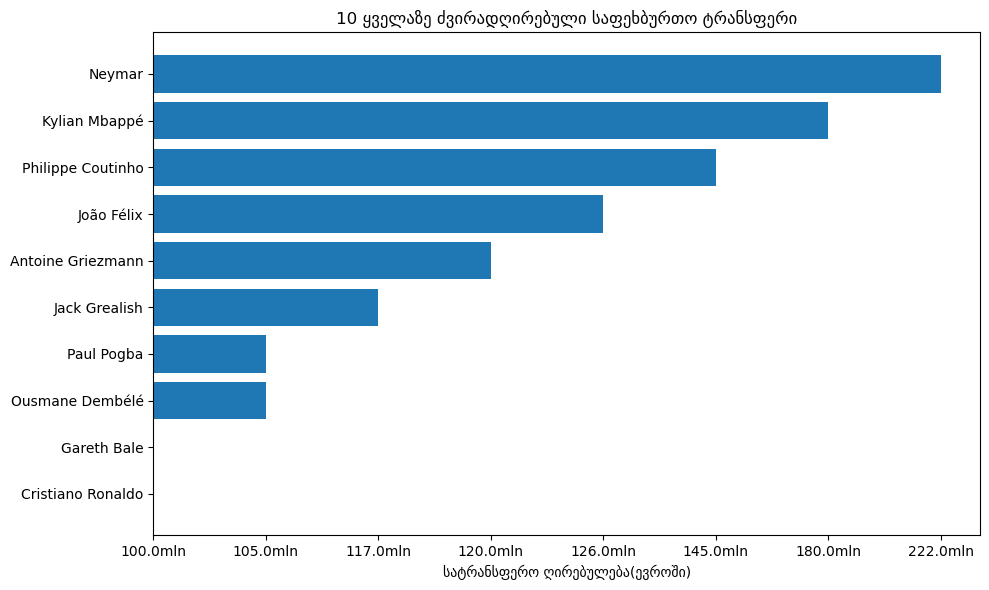

In [8]:
# დიაგრამა1: 10 ყველაზე ძვირი ტრანსფერი
cursor.execute("SELECT Player, Fee_euro FROM transfers ORDER BY Fee_euro DESC LIMIT 10")
data = cursor.fetchall()

players = [x[0] for x in data]
fees = [f'{x[1]}mln' for x in data]  

plt.figure(figsize=(10, 6))
plt.barh(players[::-1], fees[::-1])
plt.title('10 ყველაზე ძვირადღირებული საფეხბურთო ტრანსფერი')
plt.xlabel('სატრანსფერო ღირებულება(ევროში)')
plt.tight_layout()
plt.show()


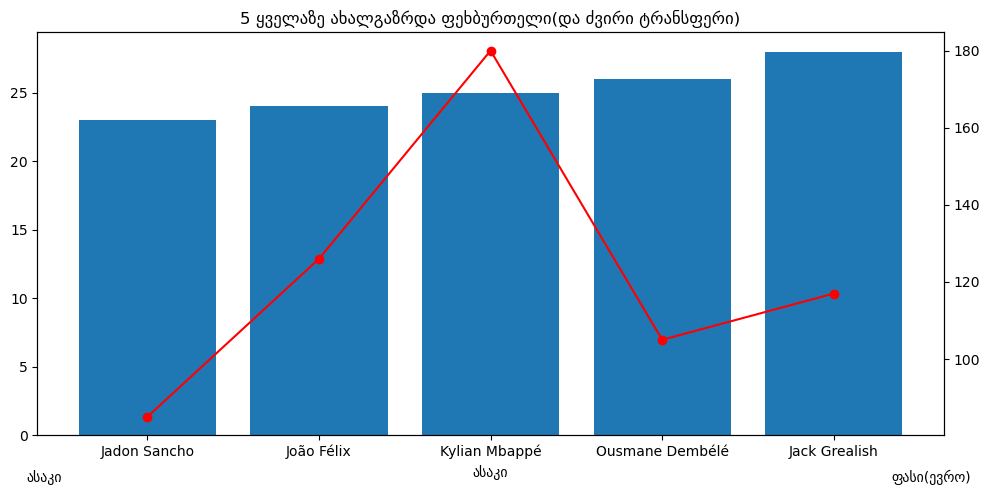

In [9]:
# დიაგრამა2: 5 ყველაზე ახალგაზრდა ტრანსფერი(20 ყველაზე ძვირიდან)
cursor.execute("SELECT Player, Born, Fee_euro FROM transfers ORDER BY Born DESC LIMIT 5")
data = cursor.fetchall()

players = [x[0] for x in data]
ages = [2023 - x[1] for x in data]
fees = [x[2] for x in data]

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(players, ages)
ax1.set_xlabel('ასაკი')
ax1.tick_params(axis='y')

plt.figtext(0.031, 0.02, 'ასაკი', ha='left', va='bottom')  
plt.figtext(0.9763, 0.02, 'ფასი(ევრო)', ha='right', va='bottom')  

ax2 = ax1.twinx()
ax2.plot(players, fees, color='red', marker='o')
ax2.tick_params(axis='y')

plt.title('5 ყველაზე ახალგაზრდა ფეხბურთელი(და ძვირი ტრანსფერი)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


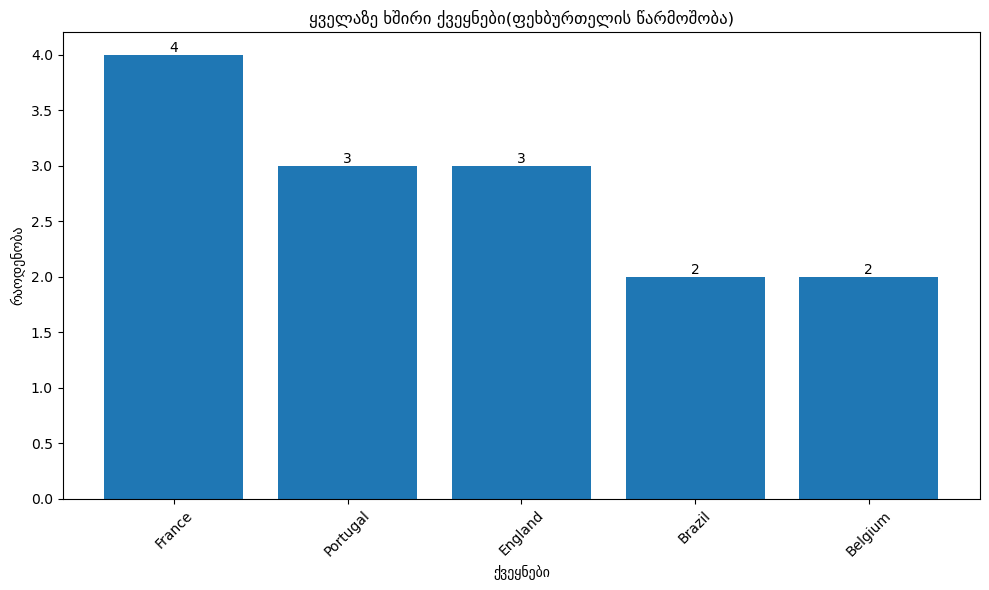

In [10]:
# დიაგრამა3: 5 ყველაზე ხშირად ნახსენები ქვეყანა(ფებხურთელის წარმოშობა(origin))
cursor.execute("""
    SELECT Origin, COUNT(*) as count 
    FROM transfers 
    GROUP BY Origin 
    ORDER BY count DESC
    LIMIT 5
""")
top5 = cursor.fetchall()

countries = [x[0] for x in top5]
counts = [x[1] for x in top5]

plt.figure(figsize=(10, 6))
bars = plt.bar(countries, counts)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.title('ყველაზე ხშირი ქვეყნები(ფეხბურთელის წარმოშობა)')
plt.xlabel('ქვეყნები')
plt.ylabel('რაოდენობა')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
conn.close()